# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [1]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

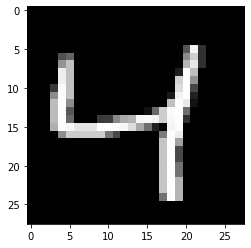

In [3]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. Feel free to use TensorFlow's higher level API, `tf.layers`. For instance, you would use [`tf.layers.dense(inputs, units, activation=tf.nn.relu)`](https://www.tensorflow.org/api_docs/python/tf/layers/dense) to create a fully connected layer with a ReLU activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [4]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 128 # feel free to change this value
image_size = 784

# Input and target placeholders
inputs_ = tf.placeholder("float", (None, image_size))
targets_ = tf.placeholder("float", (None, image_size))

# Output of hidden layer, single fully connected layer here with ReLU activation
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits, fully connected layer with no activation
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from logits
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

Instructions for updating:
Use keras.layers.dense instead.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## Training

In [5]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [6]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6932
Epoch: 1/20... Training loss: 0.6821
Epoch: 1/20... Training loss: 0.6703
Epoch: 1/20... Training loss: 0.6566
Epoch: 1/20... Training loss: 0.6390
Epoch: 1/20... Training loss: 0.6184
Epoch: 1/20... Training loss: 0.5939
Epoch: 1/20... Training loss: 0.5659
Epoch: 1/20... Training loss: 0.5392
Epoch: 1/20... Training loss: 0.5080
Epoch: 1/20... Training loss: 0.4775
Epoch: 1/20... Training loss: 0.4394
Epoch: 1/20... Training loss: 0.4209
Epoch: 1/20... Training loss: 0.3939
Epoch: 1/20... Training loss: 0.3746
Epoch: 1/20... Training loss: 0.3611
Epoch: 1/20... Training loss: 0.3492
Epoch: 1/20... Training loss: 0.3293
Epoch: 1/20... Training loss: 0.3240
Epoch: 1/20... Training loss: 0.3111
Epoch: 1/20... Training loss: 0.3048
Epoch: 1/20... Training loss: 0.2955
Epoch: 1/20... Training loss: 0.2832
Epoch: 1/20... Training loss: 0.2848
Epoch: 1/20... Training loss: 0.2944
Epoch: 1/20... Training loss: 0.2845
Epoch: 1/20... Training loss: 0.2791
E

Epoch: 1/20... Training loss: 0.1327
Epoch: 1/20... Training loss: 0.1365
Epoch: 1/20... Training loss: 0.1344
Epoch: 1/20... Training loss: 0.1353
Epoch: 1/20... Training loss: 0.1324
Epoch: 1/20... Training loss: 0.1321
Epoch: 1/20... Training loss: 0.1329
Epoch: 1/20... Training loss: 0.1336
Epoch: 1/20... Training loss: 0.1375
Epoch: 1/20... Training loss: 0.1312
Epoch: 1/20... Training loss: 0.1276
Epoch: 1/20... Training loss: 0.1355
Epoch: 1/20... Training loss: 0.1353
Epoch: 1/20... Training loss: 0.1283
Epoch: 1/20... Training loss: 0.1348
Epoch: 1/20... Training loss: 0.1315
Epoch: 1/20... Training loss: 0.1289
Epoch: 1/20... Training loss: 0.1280
Epoch: 1/20... Training loss: 0.1301
Epoch: 1/20... Training loss: 0.1353
Epoch: 1/20... Training loss: 0.1335
Epoch: 1/20... Training loss: 0.1341
Epoch: 1/20... Training loss: 0.1275
Epoch: 1/20... Training loss: 0.1268
Epoch: 1/20... Training loss: 0.1310
Epoch: 1/20... Training loss: 0.1348
Epoch: 1/20... Training loss: 0.1347
E

Epoch: 2/20... Training loss: 0.1058
Epoch: 2/20... Training loss: 0.1074
Epoch: 2/20... Training loss: 0.1058
Epoch: 2/20... Training loss: 0.1037
Epoch: 2/20... Training loss: 0.1057
Epoch: 2/20... Training loss: 0.1046
Epoch: 2/20... Training loss: 0.1054
Epoch: 2/20... Training loss: 0.1042
Epoch: 2/20... Training loss: 0.1061
Epoch: 2/20... Training loss: 0.1053
Epoch: 2/20... Training loss: 0.0997
Epoch: 2/20... Training loss: 0.1029
Epoch: 2/20... Training loss: 0.1076
Epoch: 2/20... Training loss: 0.1029
Epoch: 2/20... Training loss: 0.1031
Epoch: 2/20... Training loss: 0.1004
Epoch: 2/20... Training loss: 0.1003
Epoch: 2/20... Training loss: 0.1043
Epoch: 2/20... Training loss: 0.1030
Epoch: 2/20... Training loss: 0.0978
Epoch: 2/20... Training loss: 0.1048
Epoch: 2/20... Training loss: 0.1045
Epoch: 2/20... Training loss: 0.1030
Epoch: 2/20... Training loss: 0.1019
Epoch: 2/20... Training loss: 0.1034
Epoch: 2/20... Training loss: 0.1021
Epoch: 2/20... Training loss: 0.1027
E

Epoch: 3/20... Training loss: 0.0928
Epoch: 3/20... Training loss: 0.0906
Epoch: 3/20... Training loss: 0.0912
Epoch: 3/20... Training loss: 0.0914
Epoch: 3/20... Training loss: 0.0906
Epoch: 3/20... Training loss: 0.0919
Epoch: 3/20... Training loss: 0.0874
Epoch: 3/20... Training loss: 0.0917
Epoch: 3/20... Training loss: 0.0904
Epoch: 3/20... Training loss: 0.0909
Epoch: 3/20... Training loss: 0.0888
Epoch: 3/20... Training loss: 0.0919
Epoch: 3/20... Training loss: 0.0911
Epoch: 3/20... Training loss: 0.0894
Epoch: 3/20... Training loss: 0.0921
Epoch: 3/20... Training loss: 0.0925
Epoch: 3/20... Training loss: 0.0914
Epoch: 3/20... Training loss: 0.0897
Epoch: 3/20... Training loss: 0.0885
Epoch: 3/20... Training loss: 0.0914
Epoch: 3/20... Training loss: 0.0893
Epoch: 3/20... Training loss: 0.0889
Epoch: 3/20... Training loss: 0.0891
Epoch: 3/20... Training loss: 0.0887
Epoch: 3/20... Training loss: 0.0875
Epoch: 3/20... Training loss: 0.0905
Epoch: 3/20... Training loss: 0.0890
E

Epoch: 4/20... Training loss: 0.0828
Epoch: 4/20... Training loss: 0.0823
Epoch: 4/20... Training loss: 0.0846
Epoch: 4/20... Training loss: 0.0842
Epoch: 4/20... Training loss: 0.0835
Epoch: 4/20... Training loss: 0.0823
Epoch: 4/20... Training loss: 0.0804
Epoch: 4/20... Training loss: 0.0830
Epoch: 4/20... Training loss: 0.0779
Epoch: 4/20... Training loss: 0.0828
Epoch: 4/20... Training loss: 0.0829
Epoch: 4/20... Training loss: 0.0821
Epoch: 4/20... Training loss: 0.0838
Epoch: 4/20... Training loss: 0.0815
Epoch: 4/20... Training loss: 0.0807
Epoch: 4/20... Training loss: 0.0815
Epoch: 4/20... Training loss: 0.0838
Epoch: 4/20... Training loss: 0.0824
Epoch: 4/20... Training loss: 0.0819
Epoch: 4/20... Training loss: 0.0824
Epoch: 4/20... Training loss: 0.0850
Epoch: 4/20... Training loss: 0.0813
Epoch: 4/20... Training loss: 0.0839
Epoch: 4/20... Training loss: 0.0831
Epoch: 4/20... Training loss: 0.0830
Epoch: 4/20... Training loss: 0.0811
Epoch: 4/20... Training loss: 0.0809
E

Epoch: 5/20... Training loss: 0.0769
Epoch: 5/20... Training loss: 0.0800
Epoch: 5/20... Training loss: 0.0778
Epoch: 5/20... Training loss: 0.0769
Epoch: 5/20... Training loss: 0.0760
Epoch: 5/20... Training loss: 0.0770
Epoch: 5/20... Training loss: 0.0791
Epoch: 5/20... Training loss: 0.0781
Epoch: 5/20... Training loss: 0.0810
Epoch: 5/20... Training loss: 0.0776
Epoch: 5/20... Training loss: 0.0795
Epoch: 5/20... Training loss: 0.0763
Epoch: 5/20... Training loss: 0.0768
Epoch: 5/20... Training loss: 0.0759
Epoch: 5/20... Training loss: 0.0773
Epoch: 5/20... Training loss: 0.0743
Epoch: 5/20... Training loss: 0.0767
Epoch: 5/20... Training loss: 0.0770
Epoch: 5/20... Training loss: 0.0803
Epoch: 5/20... Training loss: 0.0766
Epoch: 5/20... Training loss: 0.0792
Epoch: 5/20... Training loss: 0.0782
Epoch: 5/20... Training loss: 0.0735
Epoch: 5/20... Training loss: 0.0798
Epoch: 5/20... Training loss: 0.0779
Epoch: 5/20... Training loss: 0.0787
Epoch: 5/20... Training loss: 0.0750
E

Epoch: 5/20... Training loss: 0.0734
Epoch: 5/20... Training loss: 0.0757
Epoch: 5/20... Training loss: 0.0758
Epoch: 5/20... Training loss: 0.0749
Epoch: 5/20... Training loss: 0.0741
Epoch: 5/20... Training loss: 0.0763
Epoch: 5/20... Training loss: 0.0739
Epoch: 5/20... Training loss: 0.0738
Epoch: 5/20... Training loss: 0.0756
Epoch: 5/20... Training loss: 0.0758
Epoch: 5/20... Training loss: 0.0757
Epoch: 5/20... Training loss: 0.0779
Epoch: 5/20... Training loss: 0.0758
Epoch: 5/20... Training loss: 0.0743
Epoch: 5/20... Training loss: 0.0745
Epoch: 5/20... Training loss: 0.0755
Epoch: 5/20... Training loss: 0.0730
Epoch: 5/20... Training loss: 0.0739
Epoch: 5/20... Training loss: 0.0743
Epoch: 5/20... Training loss: 0.0746
Epoch: 5/20... Training loss: 0.0757
Epoch: 5/20... Training loss: 0.0735
Epoch: 5/20... Training loss: 0.0741
Epoch: 5/20... Training loss: 0.0762
Epoch: 5/20... Training loss: 0.0724
Epoch: 5/20... Training loss: 0.0722
Epoch: 5/20... Training loss: 0.0723
E

Epoch: 6/20... Training loss: 0.0717
Epoch: 6/20... Training loss: 0.0734
Epoch: 6/20... Training loss: 0.0734
Epoch: 6/20... Training loss: 0.0729
Epoch: 6/20... Training loss: 0.0739
Epoch: 6/20... Training loss: 0.0703
Epoch: 6/20... Training loss: 0.0764
Epoch: 6/20... Training loss: 0.0755
Epoch: 6/20... Training loss: 0.0722
Epoch: 6/20... Training loss: 0.0744
Epoch: 6/20... Training loss: 0.0708
Epoch: 6/20... Training loss: 0.0711
Epoch: 6/20... Training loss: 0.0713
Epoch: 6/20... Training loss: 0.0721
Epoch: 6/20... Training loss: 0.0725
Epoch: 6/20... Training loss: 0.0734
Epoch: 6/20... Training loss: 0.0713
Epoch: 6/20... Training loss: 0.0740
Epoch: 6/20... Training loss: 0.0730
Epoch: 6/20... Training loss: 0.0755
Epoch: 6/20... Training loss: 0.0734
Epoch: 6/20... Training loss: 0.0741
Epoch: 6/20... Training loss: 0.0721
Epoch: 6/20... Training loss: 0.0758
Epoch: 6/20... Training loss: 0.0708
Epoch: 6/20... Training loss: 0.0733
Epoch: 6/20... Training loss: 0.0748
E

Epoch: 7/20... Training loss: 0.0724
Epoch: 7/20... Training loss: 0.0715
Epoch: 7/20... Training loss: 0.0706
Epoch: 7/20... Training loss: 0.0712
Epoch: 7/20... Training loss: 0.0697
Epoch: 7/20... Training loss: 0.0710
Epoch: 7/20... Training loss: 0.0724
Epoch: 7/20... Training loss: 0.0717
Epoch: 7/20... Training loss: 0.0716
Epoch: 7/20... Training loss: 0.0713
Epoch: 7/20... Training loss: 0.0696
Epoch: 7/20... Training loss: 0.0733
Epoch: 7/20... Training loss: 0.0732
Epoch: 7/20... Training loss: 0.0717
Epoch: 7/20... Training loss: 0.0728
Epoch: 7/20... Training loss: 0.0706
Epoch: 7/20... Training loss: 0.0726
Epoch: 7/20... Training loss: 0.0705
Epoch: 7/20... Training loss: 0.0704
Epoch: 7/20... Training loss: 0.0734
Epoch: 7/20... Training loss: 0.0708
Epoch: 7/20... Training loss: 0.0708
Epoch: 7/20... Training loss: 0.0723
Epoch: 7/20... Training loss: 0.0736
Epoch: 7/20... Training loss: 0.0696
Epoch: 7/20... Training loss: 0.0721
Epoch: 7/20... Training loss: 0.0714
E

Epoch: 8/20... Training loss: 0.0710
Epoch: 8/20... Training loss: 0.0714
Epoch: 8/20... Training loss: 0.0697
Epoch: 8/20... Training loss: 0.0720
Epoch: 8/20... Training loss: 0.0686
Epoch: 8/20... Training loss: 0.0700
Epoch: 8/20... Training loss: 0.0719
Epoch: 8/20... Training loss: 0.0709
Epoch: 8/20... Training loss: 0.0717
Epoch: 8/20... Training loss: 0.0711
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0693
Epoch: 8/20... Training loss: 0.0705
Epoch: 8/20... Training loss: 0.0706
Epoch: 8/20... Training loss: 0.0684
Epoch: 8/20... Training loss: 0.0718
Epoch: 8/20... Training loss: 0.0716
Epoch: 8/20... Training loss: 0.0703
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0708
Epoch: 8/20... Training loss: 0.0732
Epoch: 8/20... Training loss: 0.0696
Epoch: 8/20... Training loss: 0.0702
Epoch: 8/20... Training loss: 0.0710
Epoch: 8/20... Training loss: 0.0699
Epoch: 8/20... Training loss: 0.0704
Epoch: 8/20... Training loss: 0.0711
E

Epoch: 9/20... Training loss: 0.0716
Epoch: 9/20... Training loss: 0.0694
Epoch: 9/20... Training loss: 0.0725
Epoch: 9/20... Training loss: 0.0709
Epoch: 9/20... Training loss: 0.0696
Epoch: 9/20... Training loss: 0.0693
Epoch: 9/20... Training loss: 0.0705
Epoch: 9/20... Training loss: 0.0704
Epoch: 9/20... Training loss: 0.0702
Epoch: 9/20... Training loss: 0.0704
Epoch: 9/20... Training loss: 0.0708
Epoch: 9/20... Training loss: 0.0686
Epoch: 9/20... Training loss: 0.0671
Epoch: 9/20... Training loss: 0.0695
Epoch: 9/20... Training loss: 0.0677
Epoch: 9/20... Training loss: 0.0695
Epoch: 9/20... Training loss: 0.0673
Epoch: 9/20... Training loss: 0.0684
Epoch: 9/20... Training loss: 0.0694
Epoch: 9/20... Training loss: 0.0697
Epoch: 9/20... Training loss: 0.0698
Epoch: 9/20... Training loss: 0.0701
Epoch: 9/20... Training loss: 0.0685
Epoch: 9/20... Training loss: 0.0689
Epoch: 9/20... Training loss: 0.0707
Epoch: 9/20... Training loss: 0.0702
Epoch: 9/20... Training loss: 0.0713
E

Epoch: 9/20... Training loss: 0.0697
Epoch: 9/20... Training loss: 0.0676
Epoch: 9/20... Training loss: 0.0688
Epoch: 9/20... Training loss: 0.0673
Epoch: 9/20... Training loss: 0.0706
Epoch: 9/20... Training loss: 0.0698
Epoch: 9/20... Training loss: 0.0699
Epoch: 9/20... Training loss: 0.0697
Epoch: 9/20... Training loss: 0.0684
Epoch: 9/20... Training loss: 0.0692
Epoch: 9/20... Training loss: 0.0703
Epoch: 9/20... Training loss: 0.0667
Epoch: 9/20... Training loss: 0.0687
Epoch: 9/20... Training loss: 0.0700
Epoch: 9/20... Training loss: 0.0700
Epoch: 9/20... Training loss: 0.0693
Epoch: 9/20... Training loss: 0.0700
Epoch: 9/20... Training loss: 0.0681
Epoch: 9/20... Training loss: 0.0702
Epoch: 9/20... Training loss: 0.0685
Epoch: 9/20... Training loss: 0.0677
Epoch: 9/20... Training loss: 0.0707
Epoch: 9/20... Training loss: 0.0686
Epoch: 9/20... Training loss: 0.0702
Epoch: 9/20... Training loss: 0.0705
Epoch: 9/20... Training loss: 0.0700
Epoch: 9/20... Training loss: 0.0673
E

Epoch: 10/20... Training loss: 0.0693
Epoch: 10/20... Training loss: 0.0711
Epoch: 10/20... Training loss: 0.0656
Epoch: 10/20... Training loss: 0.0678
Epoch: 10/20... Training loss: 0.0682
Epoch: 10/20... Training loss: 0.0695
Epoch: 10/20... Training loss: 0.0673
Epoch: 10/20... Training loss: 0.0689
Epoch: 10/20... Training loss: 0.0696
Epoch: 10/20... Training loss: 0.0703
Epoch: 10/20... Training loss: 0.0691
Epoch: 10/20... Training loss: 0.0682
Epoch: 10/20... Training loss: 0.0687
Epoch: 10/20... Training loss: 0.0687
Epoch: 10/20... Training loss: 0.0695
Epoch: 10/20... Training loss: 0.0706
Epoch: 10/20... Training loss: 0.0704
Epoch: 10/20... Training loss: 0.0684
Epoch: 10/20... Training loss: 0.0676
Epoch: 10/20... Training loss: 0.0675
Epoch: 10/20... Training loss: 0.0669
Epoch: 10/20... Training loss: 0.0672
Epoch: 10/20... Training loss: 0.0690
Epoch: 10/20... Training loss: 0.0710
Epoch: 10/20... Training loss: 0.0688
Epoch: 10/20... Training loss: 0.0697
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0675
Epoch: 11/20... Training loss: 0.0672
Epoch: 11/20... Training loss: 0.0673
Epoch: 11/20... Training loss: 0.0681
Epoch: 11/20... Training loss: 0.0682
Epoch: 11/20... Training loss: 0.0691
Epoch: 11/20... Training loss: 0.0688
Epoch: 11/20... Training loss: 0.0703
Epoch: 11/20... Training loss: 0.0659
Epoch: 11/20... Training loss: 0.0695
Epoch: 11/20... Training loss: 0.0690
Epoch: 11/20... Training loss: 0.0667
Epoch: 11/20... Training loss: 0.0680
Epoch: 11/20... Training loss: 0.0682
Epoch: 11/20... Training loss: 0.0690
Epoch: 11/20... Training loss: 0.0696
Epoch: 11/20... Training loss: 0.0671
Epoch: 11/20... Training loss: 0.0687
Epoch: 11/20... Training loss: 0.0674
Epoch: 11/20... Training loss: 0.0685
Epoch: 11/20... Training loss: 0.0695
Epoch: 11/20... Training loss: 0.0679
Epoch: 11/20... Training loss: 0.0694
Epoch: 11/20... Training loss: 0.0673
Epoch: 11/20... Training loss: 0.0672
Epoch: 11/20... Training loss: 0.0671
Epoch: 11/20

Epoch: 12/20... Training loss: 0.0677
Epoch: 12/20... Training loss: 0.0685
Epoch: 12/20... Training loss: 0.0671
Epoch: 12/20... Training loss: 0.0676
Epoch: 12/20... Training loss: 0.0684
Epoch: 12/20... Training loss: 0.0680
Epoch: 12/20... Training loss: 0.0682
Epoch: 12/20... Training loss: 0.0667
Epoch: 12/20... Training loss: 0.0695
Epoch: 12/20... Training loss: 0.0674
Epoch: 12/20... Training loss: 0.0666
Epoch: 12/20... Training loss: 0.0655
Epoch: 12/20... Training loss: 0.0685
Epoch: 12/20... Training loss: 0.0690
Epoch: 12/20... Training loss: 0.0688
Epoch: 12/20... Training loss: 0.0696
Epoch: 12/20... Training loss: 0.0693
Epoch: 12/20... Training loss: 0.0663
Epoch: 12/20... Training loss: 0.0692
Epoch: 12/20... Training loss: 0.0680
Epoch: 12/20... Training loss: 0.0680
Epoch: 12/20... Training loss: 0.0708
Epoch: 12/20... Training loss: 0.0687
Epoch: 12/20... Training loss: 0.0691
Epoch: 12/20... Training loss: 0.0664
Epoch: 12/20... Training loss: 0.0692
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0674
Epoch: 13/20... Training loss: 0.0690
Epoch: 13/20... Training loss: 0.0683
Epoch: 13/20... Training loss: 0.0672
Epoch: 13/20... Training loss: 0.0693
Epoch: 13/20... Training loss: 0.0668
Epoch: 13/20... Training loss: 0.0689
Epoch: 13/20... Training loss: 0.0672
Epoch: 13/20... Training loss: 0.0692
Epoch: 13/20... Training loss: 0.0657
Epoch: 13/20... Training loss: 0.0689
Epoch: 13/20... Training loss: 0.0692
Epoch: 13/20... Training loss: 0.0671
Epoch: 13/20... Training loss: 0.0676
Epoch: 13/20... Training loss: 0.0685
Epoch: 13/20... Training loss: 0.0677
Epoch: 13/20... Training loss: 0.0675
Epoch: 13/20... Training loss: 0.0667
Epoch: 13/20... Training loss: 0.0670
Epoch: 13/20... Training loss: 0.0691
Epoch: 13/20... Training loss: 0.0667
Epoch: 13/20... Training loss: 0.0681
Epoch: 13/20... Training loss: 0.0668
Epoch: 13/20... Training loss: 0.0679
Epoch: 13/20... Training loss: 0.0698
Epoch: 13/20... Training loss: 0.0664
Epoch: 13/20

Epoch: 13/20... Training loss: 0.0649
Epoch: 13/20... Training loss: 0.0668
Epoch: 13/20... Training loss: 0.0663
Epoch: 13/20... Training loss: 0.0666
Epoch: 13/20... Training loss: 0.0679
Epoch: 13/20... Training loss: 0.0648
Epoch: 13/20... Training loss: 0.0680
Epoch: 13/20... Training loss: 0.0675
Epoch: 13/20... Training loss: 0.0659
Epoch: 13/20... Training loss: 0.0669
Epoch: 13/20... Training loss: 0.0690
Epoch: 13/20... Training loss: 0.0674
Epoch: 13/20... Training loss: 0.0691
Epoch: 13/20... Training loss: 0.0676
Epoch: 13/20... Training loss: 0.0677
Epoch: 13/20... Training loss: 0.0664
Epoch: 13/20... Training loss: 0.0667
Epoch: 13/20... Training loss: 0.0684
Epoch: 13/20... Training loss: 0.0671
Epoch: 13/20... Training loss: 0.0681
Epoch: 13/20... Training loss: 0.0683
Epoch: 13/20... Training loss: 0.0659
Epoch: 13/20... Training loss: 0.0682
Epoch: 13/20... Training loss: 0.0677
Epoch: 13/20... Training loss: 0.0670
Epoch: 13/20... Training loss: 0.0705
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0678
Epoch: 14/20... Training loss: 0.0678
Epoch: 14/20... Training loss: 0.0655
Epoch: 14/20... Training loss: 0.0683
Epoch: 14/20... Training loss: 0.0675
Epoch: 14/20... Training loss: 0.0662
Epoch: 14/20... Training loss: 0.0680
Epoch: 14/20... Training loss: 0.0697
Epoch: 14/20... Training loss: 0.0670
Epoch: 14/20... Training loss: 0.0678
Epoch: 14/20... Training loss: 0.0689
Epoch: 14/20... Training loss: 0.0673
Epoch: 14/20... Training loss: 0.0677
Epoch: 14/20... Training loss: 0.0686
Epoch: 14/20... Training loss: 0.0671
Epoch: 14/20... Training loss: 0.0663
Epoch: 14/20... Training loss: 0.0688
Epoch: 14/20... Training loss: 0.0667
Epoch: 14/20... Training loss: 0.0660
Epoch: 14/20... Training loss: 0.0668
Epoch: 14/20... Training loss: 0.0659
Epoch: 14/20... Training loss: 0.0690
Epoch: 14/20... Training loss: 0.0672
Epoch: 14/20... Training loss: 0.0677
Epoch: 14/20... Training loss: 0.0680
Epoch: 14/20... Training loss: 0.0674
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0677
Epoch: 15/20... Training loss: 0.0684
Epoch: 15/20... Training loss: 0.0670
Epoch: 15/20... Training loss: 0.0663
Epoch: 15/20... Training loss: 0.0674
Epoch: 15/20... Training loss: 0.0665
Epoch: 15/20... Training loss: 0.0675
Epoch: 15/20... Training loss: 0.0655
Epoch: 15/20... Training loss: 0.0698
Epoch: 15/20... Training loss: 0.0682
Epoch: 15/20... Training loss: 0.0656
Epoch: 15/20... Training loss: 0.0685
Epoch: 15/20... Training loss: 0.0676
Epoch: 15/20... Training loss: 0.0705
Epoch: 15/20... Training loss: 0.0666
Epoch: 15/20... Training loss: 0.0667
Epoch: 15/20... Training loss: 0.0648
Epoch: 15/20... Training loss: 0.0660
Epoch: 15/20... Training loss: 0.0677
Epoch: 15/20... Training loss: 0.0663
Epoch: 15/20... Training loss: 0.0680
Epoch: 15/20... Training loss: 0.0684
Epoch: 15/20... Training loss: 0.0658
Epoch: 15/20... Training loss: 0.0674
Epoch: 15/20... Training loss: 0.0669
Epoch: 15/20... Training loss: 0.0664
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0664
Epoch: 16/20... Training loss: 0.0676
Epoch: 16/20... Training loss: 0.0695
Epoch: 16/20... Training loss: 0.0667
Epoch: 16/20... Training loss: 0.0666
Epoch: 16/20... Training loss: 0.0672
Epoch: 16/20... Training loss: 0.0658
Epoch: 16/20... Training loss: 0.0665
Epoch: 16/20... Training loss: 0.0679
Epoch: 16/20... Training loss: 0.0664
Epoch: 16/20... Training loss: 0.0665
Epoch: 16/20... Training loss: 0.0668
Epoch: 16/20... Training loss: 0.0673
Epoch: 16/20... Training loss: 0.0650
Epoch: 16/20... Training loss: 0.0655
Epoch: 16/20... Training loss: 0.0671
Epoch: 16/20... Training loss: 0.0681
Epoch: 16/20... Training loss: 0.0673
Epoch: 16/20... Training loss: 0.0673
Epoch: 16/20... Training loss: 0.0683
Epoch: 16/20... Training loss: 0.0682
Epoch: 16/20... Training loss: 0.0664
Epoch: 16/20... Training loss: 0.0672
Epoch: 16/20... Training loss: 0.0677
Epoch: 16/20... Training loss: 0.0671
Epoch: 16/20... Training loss: 0.0689
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0672
Epoch: 17/20... Training loss: 0.0688
Epoch: 17/20... Training loss: 0.0671
Epoch: 17/20... Training loss: 0.0662
Epoch: 17/20... Training loss: 0.0649
Epoch: 17/20... Training loss: 0.0677
Epoch: 17/20... Training loss: 0.0696
Epoch: 17/20... Training loss: 0.0664
Epoch: 17/20... Training loss: 0.0658
Epoch: 17/20... Training loss: 0.0657
Epoch: 17/20... Training loss: 0.0655
Epoch: 17/20... Training loss: 0.0653
Epoch: 17/20... Training loss: 0.0668
Epoch: 17/20... Training loss: 0.0647
Epoch: 17/20... Training loss: 0.0661
Epoch: 17/20... Training loss: 0.0669
Epoch: 17/20... Training loss: 0.0653
Epoch: 17/20... Training loss: 0.0680
Epoch: 17/20... Training loss: 0.0672
Epoch: 17/20... Training loss: 0.0672
Epoch: 17/20... Training loss: 0.0675
Epoch: 17/20... Training loss: 0.0637
Epoch: 17/20... Training loss: 0.0676
Epoch: 17/20... Training loss: 0.0678
Epoch: 17/20... Training loss: 0.0663
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20

Epoch: 17/20... Training loss: 0.0657
Epoch: 17/20... Training loss: 0.0690
Epoch: 17/20... Training loss: 0.0679
Epoch: 17/20... Training loss: 0.0687
Epoch: 17/20... Training loss: 0.0680
Epoch: 17/20... Training loss: 0.0676
Epoch: 17/20... Training loss: 0.0667
Epoch: 17/20... Training loss: 0.0653
Epoch: 17/20... Training loss: 0.0670
Epoch: 17/20... Training loss: 0.0686
Epoch: 17/20... Training loss: 0.0670
Epoch: 17/20... Training loss: 0.0662
Epoch: 17/20... Training loss: 0.0651
Epoch: 17/20... Training loss: 0.0659
Epoch: 17/20... Training loss: 0.0648
Epoch: 17/20... Training loss: 0.0660
Epoch: 17/20... Training loss: 0.0676
Epoch: 17/20... Training loss: 0.0680
Epoch: 17/20... Training loss: 0.0667
Epoch: 17/20... Training loss: 0.0675
Epoch: 17/20... Training loss: 0.0670
Epoch: 17/20... Training loss: 0.0659
Epoch: 17/20... Training loss: 0.0673
Epoch: 17/20... Training loss: 0.0681
Epoch: 17/20... Training loss: 0.0663
Epoch: 17/20... Training loss: 0.0650
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0657
Epoch: 18/20... Training loss: 0.0670
Epoch: 18/20... Training loss: 0.0660
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0662
Epoch: 18/20... Training loss: 0.0662
Epoch: 18/20... Training loss: 0.0664
Epoch: 18/20... Training loss: 0.0681
Epoch: 18/20... Training loss: 0.0662
Epoch: 18/20... Training loss: 0.0654
Epoch: 18/20... Training loss: 0.0649
Epoch: 18/20... Training loss: 0.0673
Epoch: 18/20... Training loss: 0.0667
Epoch: 18/20... Training loss: 0.0674
Epoch: 18/20... Training loss: 0.0670
Epoch: 18/20... Training loss: 0.0656
Epoch: 18/20... Training loss: 0.0661
Epoch: 18/20... Training loss: 0.0661
Epoch: 18/20... Training loss: 0.0663
Epoch: 18/20... Training loss: 0.0660
Epoch: 18/20... Training loss: 0.0650
Epoch: 18/20... Training loss: 0.0678
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0680
Epoch: 18/20... Training loss: 0.0665
Epoch: 18/20... Training loss: 0.0655
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0677
Epoch: 19/20... Training loss: 0.0679
Epoch: 19/20... Training loss: 0.0686
Epoch: 19/20... Training loss: 0.0682
Epoch: 19/20... Training loss: 0.0665
Epoch: 19/20... Training loss: 0.0667
Epoch: 19/20... Training loss: 0.0669
Epoch: 19/20... Training loss: 0.0648
Epoch: 19/20... Training loss: 0.0678
Epoch: 19/20... Training loss: 0.0668
Epoch: 19/20... Training loss: 0.0667
Epoch: 19/20... Training loss: 0.0665
Epoch: 19/20... Training loss: 0.0662
Epoch: 19/20... Training loss: 0.0648
Epoch: 19/20... Training loss: 0.0677
Epoch: 19/20... Training loss: 0.0665
Epoch: 19/20... Training loss: 0.0667
Epoch: 19/20... Training loss: 0.0663
Epoch: 19/20... Training loss: 0.0674
Epoch: 19/20... Training loss: 0.0671
Epoch: 19/20... Training loss: 0.0661
Epoch: 19/20... Training loss: 0.0669
Epoch: 19/20... Training loss: 0.0645
Epoch: 19/20... Training loss: 0.0661
Epoch: 19/20... Training loss: 0.0651
Epoch: 19/20... Training loss: 0.0671
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0661
Epoch: 20/20... Training loss: 0.0673
Epoch: 20/20... Training loss: 0.0672
Epoch: 20/20... Training loss: 0.0662
Epoch: 20/20... Training loss: 0.0637
Epoch: 20/20... Training loss: 0.0675
Epoch: 20/20... Training loss: 0.0662
Epoch: 20/20... Training loss: 0.0696
Epoch: 20/20... Training loss: 0.0661
Epoch: 20/20... Training loss: 0.0658
Epoch: 20/20... Training loss: 0.0665
Epoch: 20/20... Training loss: 0.0692
Epoch: 20/20... Training loss: 0.0665
Epoch: 20/20... Training loss: 0.0658
Epoch: 20/20... Training loss: 0.0650
Epoch: 20/20... Training loss: 0.0668
Epoch: 20/20... Training loss: 0.0679
Epoch: 20/20... Training loss: 0.0670
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0666
Epoch: 20/20... Training loss: 0.0656
Epoch: 20/20... Training loss: 0.0667
Epoch: 20/20... Training loss: 0.0670
Epoch: 20/20... Training loss: 0.0675
Epoch: 20/20... Training loss: 0.0660
Epoch: 20/20... Training loss: 0.0663
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

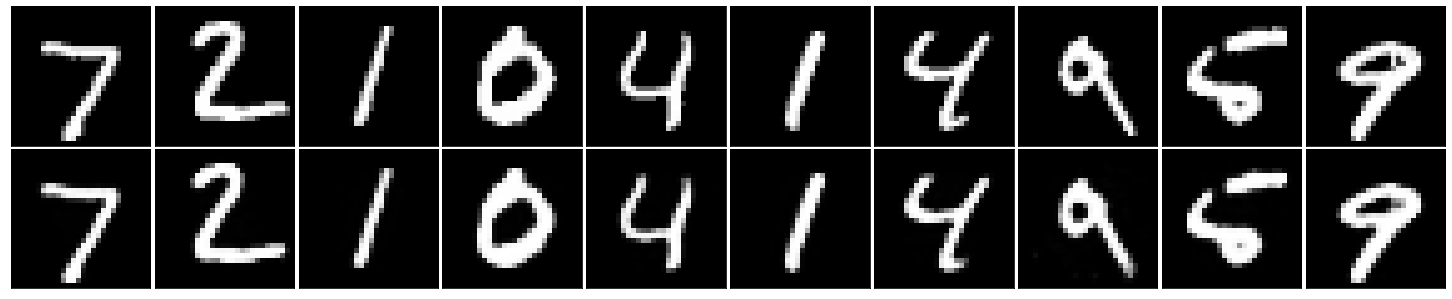

In [7]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [17]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.